In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
chs = cv2.imread('data/images/chessboard.png')
chs_gry = cv2.cvtColor(chs,cv2.COLOR_BGR2GRAY)
chs_bln1 = np.zeros_like(chs_gry,np.uint8)
chs_bln3 = np.zeros_like(chs,np.uint8)

print(chs.shape)
print(chs_gry.shape)


(3723, 3595, 3)
(3723, 3595)


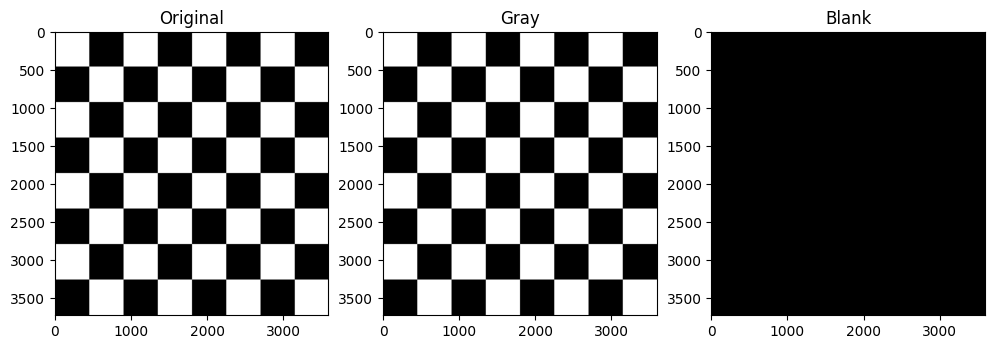

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(chs)

plt.subplot(1,3,2)
plt.title("Gray")
plt.imshow(chs_gry, cmap="gray")

plt.subplot(1,3,3)
plt.title("Blank")
plt.imshow(chs_bln1, cmap="gray")


In [15]:
# find corners

# returns matrix with values of probilities at each corner
crn_chs = cv2.cornerHarris(chs_gry,3,3,0.05)

kernel = np.ones((7,7),np.uint8)

# increase size of positives
crn_chs = cv2.dilate(crn_chs, kernel, iterations=20)

thr = 0.025*crn_chs.max()

chs_crn = chs.copy()

# if operation true, reassignment happens
chs_crn[crn_chs > thr] = [200,150,150]



chs_crn2 = chs_gry.copy()

crn_chs2 = cv2.goodFeaturesToTrack(chs_gry, 49, 0.01, 10)

# convert into integers
crn_chs2 = np.intp(crn_chs2)

for i in crn_chs2:
    x, y = i.ravel()
    cv2.circle(chs_crn2, (x, y), 100, [200,120,120], -1)

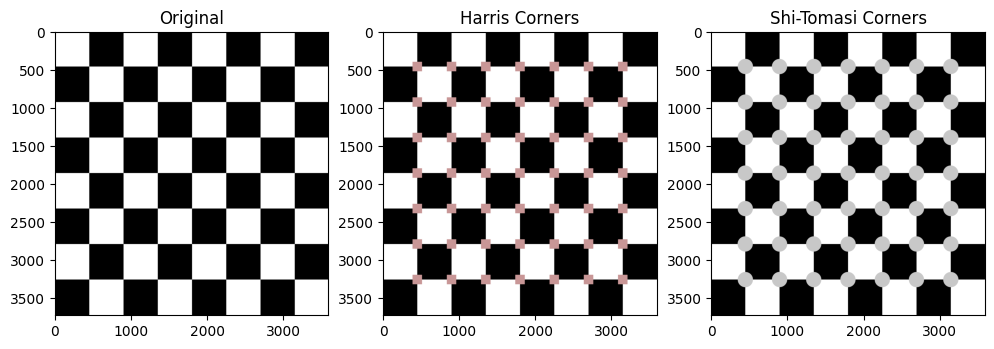

In [16]:
# display corners

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(chs)

plt.subplot(1,3,2)
plt.title("Harris Corners")
plt.imshow(chs_crn)

plt.subplot(1,3,3)
plt.title("Shi-Tomasi Corners")
plt.imshow(chs_crn2, cmap='gray')

In [6]:
shp = cv2.imread("data/images/Image.png")
shp_gry = cv2.cvtColor(shp,cv2.COLOR_BGR2GRAY)


In [7]:
# find corners

crn_shp1 = cv2.cornerHarris(shp_gry,3,3,0.05)

kernel = np.ones((7,7),np.uint8)

crn_shp1 = cv2.dilate(crn_shp1, kernel, iterations=3)

thr = 0.001*crn_shp1.max()

shp_crn = shp.copy()

# if operation true, reassignment happens
shp_crn[crn_shp1 > thr] = [200,120,120]




shp_crn2 = shp_gry.copy()

crn_shp2 = cv2.goodFeaturesToTrack(shp_gry, 200, 0.01, 10)

# convert into integers
crn_shp2 = np.intp(crn_shp2)

for i in crn_shp2:
    x, y = i.ravel()
    cv2.circle(shp_crn2, (x, y), 10, [200,120,120], -1)

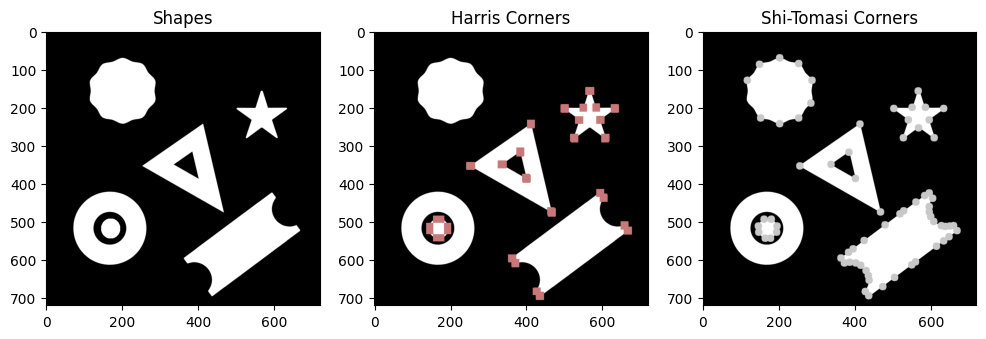

In [8]:
# display corners

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Shapes")
plt.imshow(shp_gry, cmap='gray')

plt.subplot(1,3,2)
plt.title("Harris Corners")
plt.imshow(shp_crn)

plt.subplot(1,3,3)
plt.title("Shi-Tomasi Corners")
plt.imshow(shp_crn2, cmap='gray')